In [158]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [159]:
files = ['data/dog.png', 'data/cat.png', 'data/s.JPG', 'data/p.JPG', 'data/sil.JPG', 'data/sha.JPG', 'data/kong.jpg', 'data/kong2.jpg', 'data/a01.png', 'data/JANG.jpg', 'data/waterdog.jpg']
images = [np.array(Image.open(file)) for file in files]

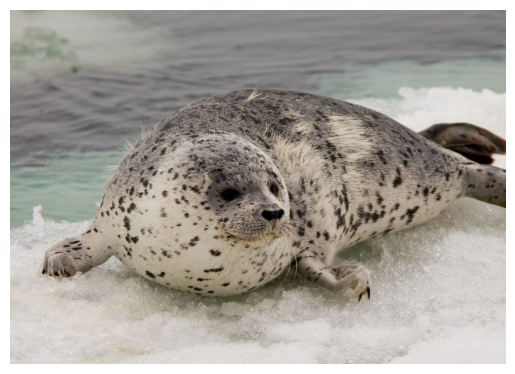

In [168]:
for image in images:
    plt.imshow(image)
    plt.axis('off')

In [161]:
import cv2 #pip install opencv-python


In [162]:
import tensorflow as tf


In [163]:
resnet50_pred=tf.keras.applications.resnet.ResNet50(weights='imagenet', input_shape=(224, 224, 3))
resnet50_pred.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_12      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_12[0… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 25,583,592 (97.59 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [164]:
from tensorflow.keras.applications.imagenet_utils import decode_predictions


In [165]:
def pred_img(img): 
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    img_resized = cv2.resize(img, (224, 224))
    pred = resnet50_pred.predict(img_resized.reshape([1, 224, 224, 3]))
    decoded_pred = decode_predictions(pred)
    for i, instance in enumerate(decoded_pred[0]): print('{}위: {} ({:.2f}%) '.format(i+1, instance[1], instance[2] * 100))


def predict_image(file):

    import numpy as np
    from PIL import Image
    import matplotlib.pyplot as plt
    import cv2 #pip install opencv-python
    import tensorflow as tf

    resnet50_pred=tf.keras.applications.resnet.ResNet50(weights='imagenet', input_shape=(224, 224, 3))
    from tensorflow.keras.applications.imagenet_utils import decode_predictions
    
    image = np.array(Image.open(file))
    image_resized = cv2.resize(image, (224, 224))
    image_reshaped = image_resized.reshape([1, 224, 224, 3])
    predicted = resnet50.predict(image_reshaped)

    decoded_predict = decode_predictions(predicted)
    return decoded_predict



    




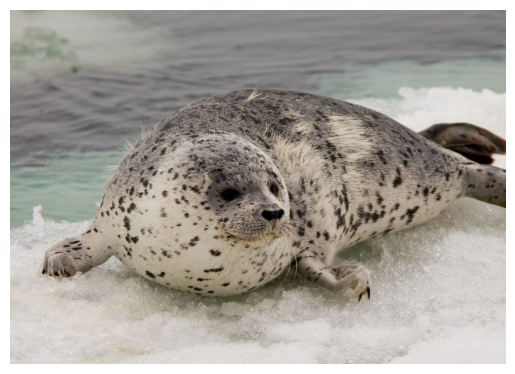

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1위: German_short-haired_pointer (88.39%) 
2위: bluetick (5.04%) 
3위: sea_lion (3.37%) 
4위: leatherback_turtle (0.53%) 
5위: dalmatian (0.36%) 


In [167]:
pred_img(images[10])
